In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [84]:
historical_data=pd.read_csv("historical_data.csv")

In [85]:
fear_greed_index_data=pd.read_csv("fear_greed_index.csv")

In [88]:
# data view

In [90]:
historical_data.head(10)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12
5,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9900,1.41,11.27,BUY,02-12-2024 22:50,1298.215466,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.000493,7.330000e+14,1.730000e+12
6,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9934,144.09,1151.77,BUY,02-12-2024 22:50,1299.624972,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,9.060000e+14,1.730000e+12
7,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,34.00,272.00,BUY,02-12-2024 22:50,1443.664541,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.011900,3.960000e+14,1.730000e+12
8,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,46.00,368.00,BUY,02-12-2024 22:50,1477.652641,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.016100,9.460000e+14,1.730000e+12
9,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,12.50,100.00,BUY,02-12-2024 22:50,1523.636541,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.004375,3.470000e+13,1.730000e+12


In [92]:
fear_greed_index_data.head(10)

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
5,1517895000,8,Extreme Fear,2018-02-06
6,1517981400,36,Fear,2018-02-07
7,1518067800,30,Fear,2018-02-08
8,1518154200,44,Fear,2018-02-09
9,1518240600,54,Neutral,2018-02-10


In [98]:
# Convert trader timestamp to datetime and extract the date only
historical_data['Date'] = pd.to_datetime(historical_data['Timestamp IST'], errors='coerce').dt.date


In [102]:
historical_data

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12,NaT
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12,NaT
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12,NaT
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12,NaT


In [104]:
# Convert sentiment date to datetime.date

fear_greed_index_data['Date'] = pd.to_datetime(fear_greed_index_data['date'], errors='coerce').dt.date

In [106]:
fear_greed_index_data

,timestamp,value,classification,date,Date
0,1517463000,30,Fear,2018-02-01,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02,2018-02-02
2,1517635800,40,Fear,2018-02-03,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05,2018-02-05
...,...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28,2025-04-28
2640,1745904600,60,Greed,2025-04-29,2025-04-29
2641,1745991000,56,Greed,2025-04-30,2025-04-30
2642,1746077400,53,Neutral,2025-05-01,2025-05-01


In [130]:
#merge

merge_=pd.merge(historical_data, fear_greed_index_data, on='Date', how='inner')

In [211]:
merge_.isnull().any()

Account             False
Coin                False
Execution Price     False
Size Tokens         False
Size USD            False
Side                False
Timestamp IST       False
Start Position      False
Direction           False
Closed PnL          False
Transaction Hash    False
Order ID            False
Crossed             False
Fee                 False
Trade ID            False
Timestamp           False
Date                False
timestamp           False
value               False
classification      False
date                False
dtype: bool

In [213]:
#there is no null values in the merge_ data


In [215]:
#Average PnL under Fear , Greed


avg_pnl_by_sentiment =merge_.groupby('classification')['Closed PnL'].mean()
avg_pnl_by_sentiment

classification
Extreme Fear       1.891632
Extreme Greed    205.816345
Fear             128.287950
Greed             53.988003
Neutral           27.088803
Name: Closed PnL, dtype: float64

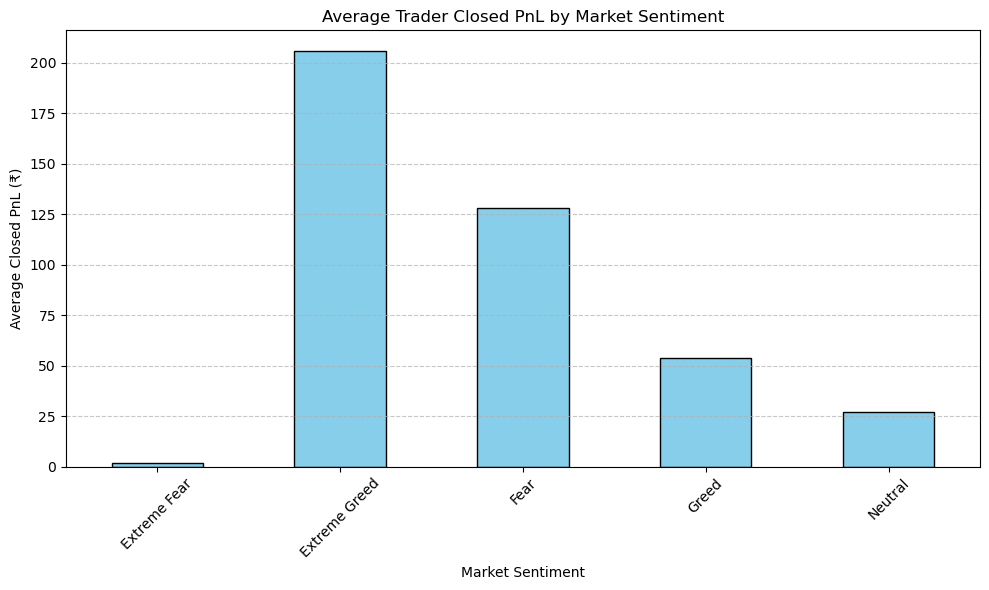

In [217]:
plt.figure(figsize=(10,6))
avg_pnl_by_sentiment.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Trader Closed PnL by Market Sentiment')
plt.ylabel('Average Closed PnL (₹)')
plt.xlabel('Market Sentiment')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#Extreme Greed delivers the highest profit ₹205.82
#Extreme Fear markets result in the lowest profitability (₹1.89), possibly due to uncertainty or panic selling.
#Fear periods still provide good returns (₹128.29) — suggesting opportunities for contrarian or volatility strategies.
#Neutral markets yield low PnL — could indicate lack of trading opportunities.
#Strategy Insight Focus trading efforts during Greed phases, and exercise caution or use specific strategies during Extreme Fear.


In [223]:
#Trade Volume


total_volume_by_sentiment = merged_df.groupby('classification')['Size USD'].sum()
total_volume_by_sentiment

classification
Extreme Fear      9580240.04
Extreme Greed    18223760.27
Fear             79674391.06
Greed            57045815.74
Neutral          11939551.21
Name: Size USD, dtype: float64

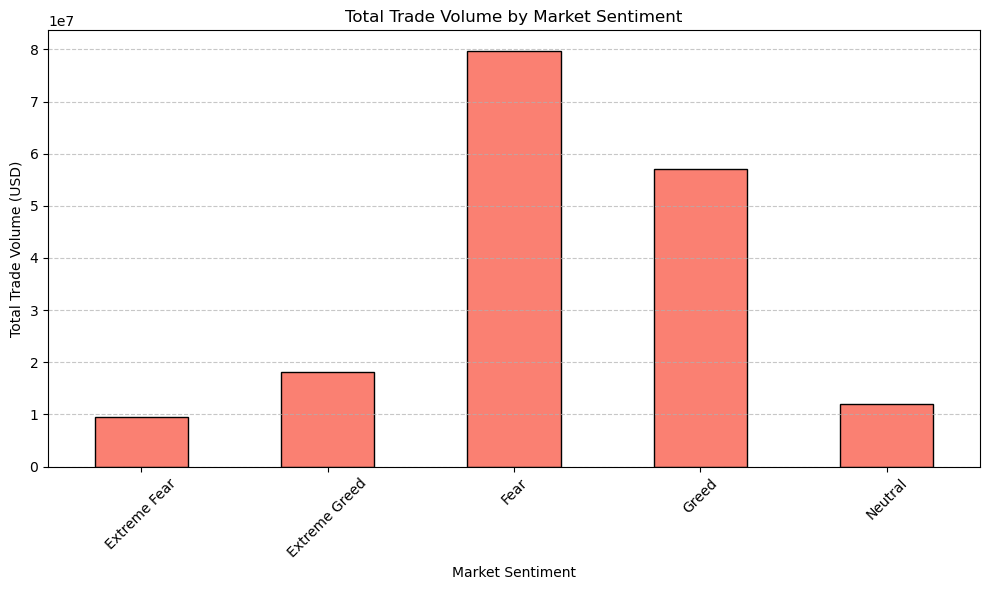

In [225]:
plt.figure(figsize=(10,6))
total_volume_by_sentiment.plot(kind='bar', color='salmon', edgecolor='black')

plt.title('Total Trade Volume by Market Sentiment')
plt.ylabel('Total Trade Volume (USD)')
plt.xlabel('Market Sentiment')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [227]:
#Extreme Fear leads to the lowest average profit.
#Neutral sentiment gives moderate profits.
#Fear shows high average profits.
#Extreme Greed results in the highest average profit.
#Greed gives decent profits but less than Fear and Extreme Greed.


In [233]:
#Win rate


win_rate = merged_df.groupby('classification').apply(lambda x: (x['Closed PnL'] > 0).mean())
print("\nWin Rate by Sentiment:\n", win_rate)


Win Rate by Sentiment:
 classification
Extreme Fear     0.292777
Extreme Greed    0.553282
Fear             0.381787
Greed            0.435707
Neutral          0.494920
dtype: float64


C:\Users\Dell\AppData\Local\Temp\ipykernel_11304\2792243123.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  win_rate = merged_df.groupby('classification').apply(lambda x: (x['Closed PnL'] > 0).mean())


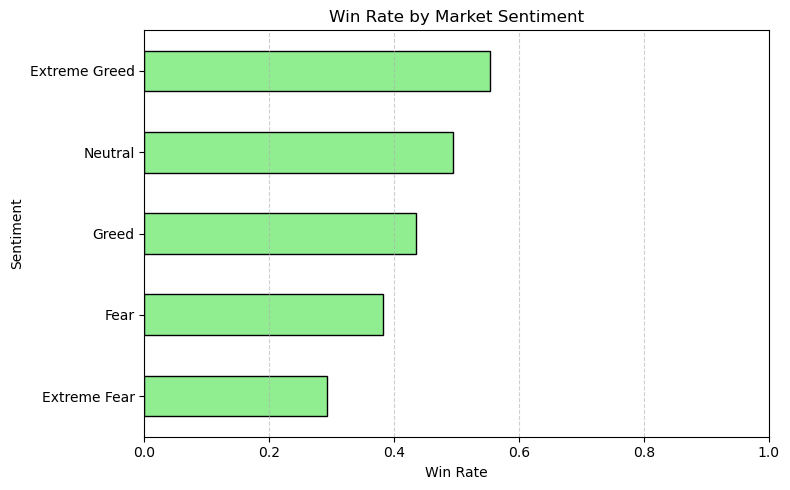

In [235]:
plt.figure(figsize=(8, 5))
win_rate.sort_values().plot(kind='barh', color='lightgreen', edgecolor='black')

plt.title('Win Rate by Market Sentiment')
plt.xlabel('Win Rate')
plt.ylabel('Sentiment')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [237]:
#Extreme Fear: Very low success — only 29% of trades win.
#Fear: Still uncertain — about 38% win rate.
#Greed: Better outcomes — around 43% win rate.
#Neutral: Fairly balanced — close to 49% of trades succeed.
#Extreme Greed: Best performance — 55% win rate.

In [245]:
#Side Preference 

side_dist = merged_df.groupby(['classification', 'Side']).size().unstack().fillna(0)
side_dist


Side,BUY,SELL
classification,,
Extreme Fear,1168,1158
Extreme Greed,1661,3960
Fear,7307,6562
Greed,5407,5885
Neutral,1020,1736


In [247]:
#Extreme Fear: Buy and sell trades are almost the same — traders are unsure what to do.
#Extreme Greed: More people are selling — they may be trying to lock in profits.
#Fear: Slightly more buying — some traders see this as a chance to buy low.
#Greed: Buy and sell are close — traders are active but cautious.
#Neutral: More selling than buying — traders may not be confident or are playing it safe.

In [258]:
#Top traders 

top_traders = merged_df.groupby(['classification', 'Account'])['Closed PnL'].sum().reset_index()
top_traders = top_traders.sort_values(['classification', 'Closed PnL'], ascending=[True, False])
print("\nTop Traders by PnL in Each Sentiment:")
print(top_traders.groupby('classification').head(3))



Top Traders by PnL in Each Sentiment:
    classification                                     Account    Closed PnL
17    Extreme Fear  0xbaaaf6571ab7d571043ff1e313a9609a10637864  3.869209e+03
6     Extreme Fear  0x4f93fead39b70a1824f981a54d4e55b278e9f760  3.084288e+03
14    Extreme Fear  0xaf40fdc468c30116bd3307bcbf4a451a7ebf1deb  2.020000e+03
39   Extreme Greed  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  9.978715e+05
41   Extreme Greed  0xbee1707d6b44d4d52bfe19e41f8a828645437aab  1.554902e+05
22   Extreme Greed  0x2c229d22b100a7beb69122eed721cee9b24011dd  2.389702e+04
42            Fear  0x083384f897ee0f19899168e3b1bec365f52a9012  1.010607e+06
56            Fear  0x72c6a4624e1dffa724e6d00d64ceae698af892a0  1.972949e+05
68            Fear  0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3  1.711983e+05
95           Greed  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  3.327058e+05
96           Greed  0xbaaaf6571ab7d571043ff1e313a9609a10637864  1.881168e+05
86           Greed  0x75f7eeb85dc639d

In [260]:
#these are are the top trader accounts

Conclusion

In [ ]:
#Extreme Greed has the highest win rate (55%), suggesting that traders are most successful during very optimistic market phases.

#Fear sentiment sees the highest total trade volume, indicating that traders are most active during uncertain or volatile times.

#Extreme Fear results in the lowest win rate (29%), highlighting that trades during panic periods tend to perform poorly.

#Neutral sentiment experiences the lowest trading volume but maintains a balanced win rate (49%), reflecting cautious and measured trading behavior.
#Top-performing traders emerge mostly during Greed and Neutral periods, showing that sentiment-aware strategies can improve outcomes.
